In [1]:
import sys
import os

In [2]:
# need to be able to import src
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

# absolute path to the src directory
src_path = os.path.abspath("../src")

# Add src directory to system path
sys.path.append(src_path)

# get the /MLCBAss1/Assignment-2 path
ass_path=sys.path[-2]

print(ass_path)

/home/sdi1700187/MLCBAss2/Assignment-2


In [3]:
%load_ext autoreload
%autoreload 2

from functions import *

/home/sdi1700187/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
df=pd.read_csv('../data/dev_breast_cancer.csv')
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
from pathlib import Path

my_file = Path("../data/rncv_summary_results.csv")
if not my_file.is_file():
    perform_rnCV(path='../data/dev_breast_cancer.csv')

[I 2025-05-04 12:29:11,551] A new study created in memory with name: Winner:LogisticRegression


The winner method is LogisticRegression with 9/9 metrics
 ALL HAIL THE KING!


[I 2025-05-04 12:29:13,980] Trial 0 finished with value: 0.5 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.0013119186905634675, 'l1_ratio': 0.9981235531659317}. Best is trial 0 with value: 0.5.
[I 2025-05-04 12:29:16,302] Trial 1 finished with value: 0.9677162397216952 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.6460329408578489, 'l1_ratio': 0.7355079670454229}. Best is trial 1 with value: 0.9677162397216952.
[I 2025-05-04 12:29:18,533] Trial 2 finished with value: 0.9603020240354206 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.06489650021852843, 'l1_ratio': 0.006751217061082948}. Best is trial 1 with value: 0.9677162397216952.
[I 2025-05-04 12:29:20,812] Trial 3 finished with value: 0.9337345825426946 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.0020940786353382886, 'l1_ratio': 0.9635265533448985}. Best is trial 1 with value: 0.9677162397216952.
[I 2025-05-04 12:29:23,045] Trial 4 finished with value: 0.6278225806451612 a

EARLY STOPPING: No improvement after 10 trials!
--> Best trial is 22 with value: 0.978089421252372 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.4335722599302748, 'l1_ratio': 0.16090509614947796}

For model LogisticRegression the best parameters are {'penalty': 'l1', 'solver': 'saga', 'C': 0.4335722599302748, 'l1_ratio': 0.16090509614947796}


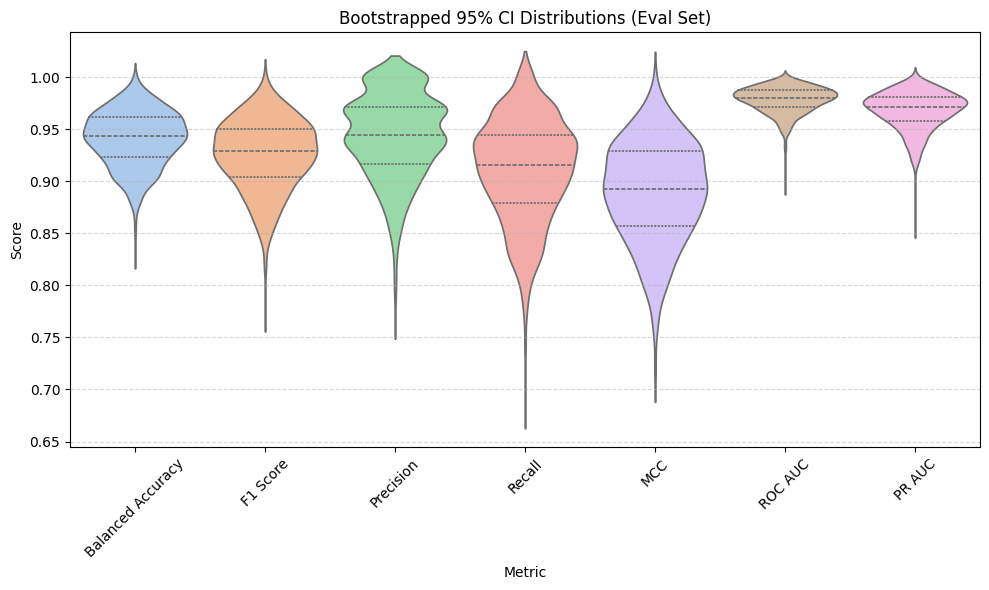

[I 2025-05-04 12:30:34,355] A new study created in memory with name: Winner:LogisticRegression
[I 2025-05-04 12:30:36,779] Trial 0 finished with value: 0.5 and parameters: {'penalty': 'l1', 'solver': 'saga', 'C': 0.002778234339267195, 'l1_ratio': 0.2851229613560812}. Best is trial 0 with value: 0.5.
[I 2025-05-04 12:30:39,079] Trial 1 finished with value: 0.5 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.001212130166399459, 'l1_ratio': 0.8616001671905943}. Best is trial 0 with value: 0.5.
[I 2025-05-04 12:30:41,450] Trial 2 finished with value: 0.9660113022941971 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.033498495391617984, 'l1_ratio': 0.014150850398066295}. Best is trial 2 with value: 0.9660113022941971.
[I 2025-05-04 12:30:43,968] Trial 3 finished with value: 0.9660113022941971 and parameters: {'penalty': 'elasticnet', 'solver': 'saga', 'C': 0.18341699303361067, 'l1_ratio': 0.2590735793743102}. Best is trial 2 with value: 0.96601130229419

EARLY STOPPING: No improvement after 10 trials!
--> Best trial is 23 with value: 0.9716523279352227 and parameters: {'penalty': 'l2', 'solver': 'saga', 'C': 0.37649962504368517, 'l1_ratio': 0.17463747828407591}

For model LogisticRegression the best parameters are {'penalty': 'l2', 'solver': 'saga', 'C': 0.37649962504368517, 'l1_ratio': 0.17463747828407591}


In [6]:
if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_summary_results.csv")

results_df=replace_column(df=results_df,to_be_replaced='Unnamed: 0',to_be_added='Model')

results_df.to_csv("../data/rncv_summary_results.csv",index=False)

if my_file.is_file():
    results_df=pd.read_csv("../data/rncv_summary_results.csv")


winner=get_winner(summary=results_df)

print(f"The winner method is {winner[0]} with {winner[1]}/{results_df.shape[1]-1} metrics\n ALL HAIL THE KING!")

df_dev=pd.read_csv('../data/dev_breast_cancer.csv')
df_complete=pd.read_csv('../data/breast_cancer.csv')
df_val=pd.read_csv('../data/val_clean_breast_cancer.csv')

tuned_winner_dev=winner_tuning(df=df_dev,winner=winner[0])

bootstrap_model(df_dev=df_dev,df_val=df_val,model=tuned_winner_dev)

tuned_winner_complete=winner_tuning(df=df_complete,winner=winner[0])